In [58]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
import torch.nn as nn

In [60]:
# Create a column matrix of X values
X = torch.linspace(1,50,50).reshape(-1,1)
X.shape

torch.Size([50, 1])

In [61]:
# Create a "random" array of error values
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1), dtype=torch.float)
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [62]:
# Create a column matrix of y values
y = 2*X + 1 + e
y.shape

torch.Size([50, 1])

Text(0.5, 0, 'x')

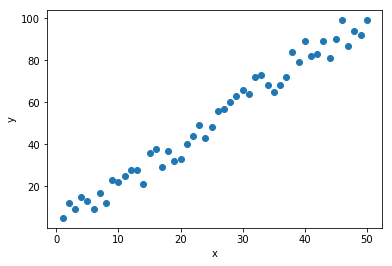

In [63]:
# Plot the results
# We need to convert tensors to numpy arrays for plotting
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')

Note that when we created tensor $X$, we did <em>not</em> pass <tt>requires_grad=True</tt>. This means that $y$ doesn't have a gradient function, and <tt>y.backward()</tt> won't work. Since PyTorch is not tracking operations, it doesn't know the relationship between $X$ and $y$.

## Simple Linear Model

In [64]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


Without seeing any data, the model sets a random weight of 0.1060 and a bias of 0.9638.

## Model Classes

In [65]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        
        # fully connected layer but does not refer to linear regression.
        self.linear = nn.Linear(in_features, out_features)  
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

When <tt>Model</tt> is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For our purposes we'll use (1,1).<br>As above, we can see the initial hyperparameters.

In [66]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)

# Weight and bias of linear layer
print('Weight:', model.linear.weight.item())
print('Bias:', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias: 0.9637961387634277


In [67]:
# When there are more parameters, use this.
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [68]:
# Let's the results when we pass tensor into the model
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


### Plot the initial model

In [69]:
x1 = np.linspace(0, 50.0, 50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [70]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

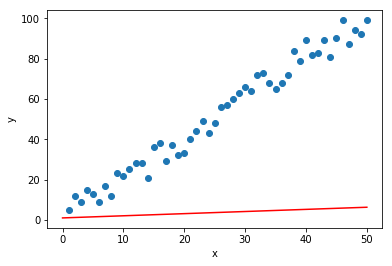

In [71]:
# real points
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')

# predicted points
plt.plot(x1, y1, 'r')

In [72]:
# Set the loss function
criterion = nn.MSELoss()

In [73]:
# Set the optimization
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

### Train the model

In [84]:
epochs = 50
losses = []

for i in range(epochs):
    i += 1
    
    # Predicted on the forward pass
    y_pred = model.forward(X)
    
    # calculate loss
    loss = criterion(y_pred, y)
    
    # Record that error
    losses.append(loss)
    
    print(f"epoch {i:2} loss: {loss.item():10.8f} \
    weight: {model.linear.weight.item():10.8f} bias: {model.linear.bias.item():10.8f}")
     
    # Reset the gradients for each new epoch
    # Gradients accumulate with every backprop. 
    # To prevent compounding we need to reset the stored gradient for each new epoch.
    optimizer.zero_grad()  
          
    # backprop
    loss.backward()
       
    # updates the hyperparameters
    optimizer.step()
    

epoch  1 loss: 20.98680878     weight: 1.98075056 bias: 1.15903306
epoch  2 loss: 20.98636818     weight: 1.98073113 bias: 1.15969670
epoch  3 loss: 20.98592567     weight: 1.98071122 bias: 1.16035998
epoch  4 loss: 20.98548889     weight: 1.98069167 bias: 1.16102302
epoch  5 loss: 20.98505020     weight: 1.98067176 bias: 1.16168571
epoch  6 loss: 20.98460960     weight: 1.98065245 bias: 1.16234803
epoch  7 loss: 20.98416901     weight: 1.98063242 bias: 1.16301012
epoch  8 loss: 20.98373604     weight: 1.98061311 bias: 1.16367185
epoch  9 loss: 20.98329353     weight: 1.98059309 bias: 1.16433322
epoch 10 loss: 20.98285675     weight: 1.98057389 bias: 1.16499436
epoch 11 loss: 20.98242569     weight: 1.98055387 bias: 1.16565514
epoch 12 loss: 20.98198700     weight: 1.98053443 bias: 1.16631556
epoch 13 loss: 20.98155022     weight: 1.98051476 bias: 1.16697562
epoch 14 loss: 20.98111343     weight: 1.98049510 bias: 1.16763544
epoch 15 loss: 20.98068237     weight: 1.98047566 bias: 1.1682

Text(0.5, 0, 'Epoch')

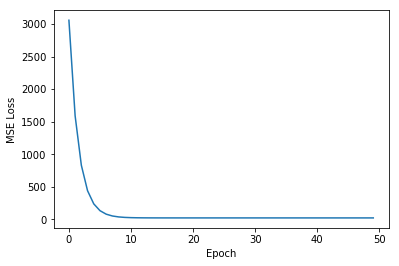

In [75]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')

## Plot the result

In [78]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

Current weight: 1.98381913, Current bias: 1.05575156



In [76]:
x = np.linspace(0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*X + current_bias
predicted_y

tensor([[  3.0396],
        [  5.0234],
        [  7.0072],
        [  8.9910],
        [ 10.9748],
        [ 12.9587],
        [ 14.9425],
        [ 16.9263],
        [ 18.9101],
        [ 20.8939],
        [ 22.8778],
        [ 24.8616],
        [ 26.8454],
        [ 28.8292],
        [ 30.8130],
        [ 32.7969],
        [ 34.7807],
        [ 36.7645],
        [ 38.7483],
        [ 40.7321],
        [ 42.7160],
        [ 44.6998],
        [ 46.6836],
        [ 48.6674],
        [ 50.6512],
        [ 52.6350],
        [ 54.6189],
        [ 56.6027],
        [ 58.5865],
        [ 60.5703],
        [ 62.5541],
        [ 64.5380],
        [ 66.5218],
        [ 68.5056],
        [ 70.4894],
        [ 72.4732],
        [ 74.4571],
        [ 76.4409],
        [ 78.4247],
        [ 80.4085],
        [ 82.3923],
        [ 84.3762],
        [ 86.3600],
        [ 88.3438],
        [ 90.3276],
        [ 92.3114],
        [ 94.2952],
        [ 96.2791],
        [ 98.2629],
        [100.2467]])

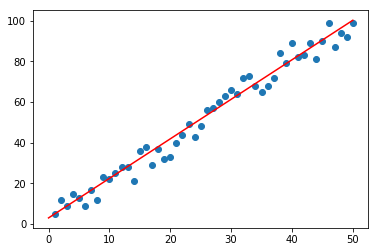

In [80]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y.numpy(), 'r')

## Great job